### Explore Dataset


1- Import Librariies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2-Data set import from seaborn

In [8]:
df=sns.load_dataset('iris')
#save in csv_format
df.to_csv("Iris_data_set.csv")
# import csv fiile
df=pd.read_csv("Iris_data_set.csv")

3- Explore data set through different functiions

In [9]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species'],
      dtype='object')

In [11]:
df.dtypes

Unnamed: 0        int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isnull().sum()

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df.index

RangeIndex(start=0, stop=150, step=1)

# Visualize data set

1-Barplot 

Bar Plot: Used to compare values across different categories.



<Axes: xlabel='species', ylabel='sepal_length'>

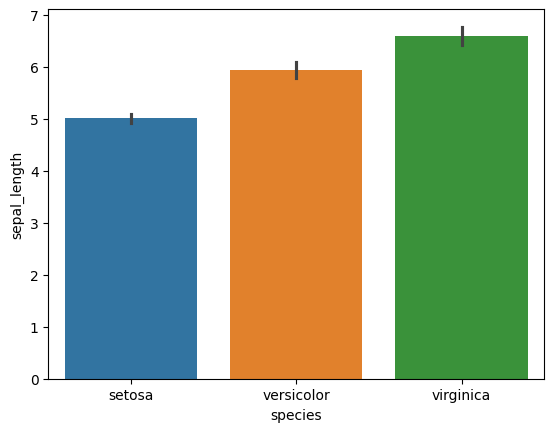

In [21]:
sns.barplot(x='species',y='sepal_length',data=df,hue='species')

2-PairPlot

Pair Plot: Used to visualize relationships between all numerical features in a dataset at once.



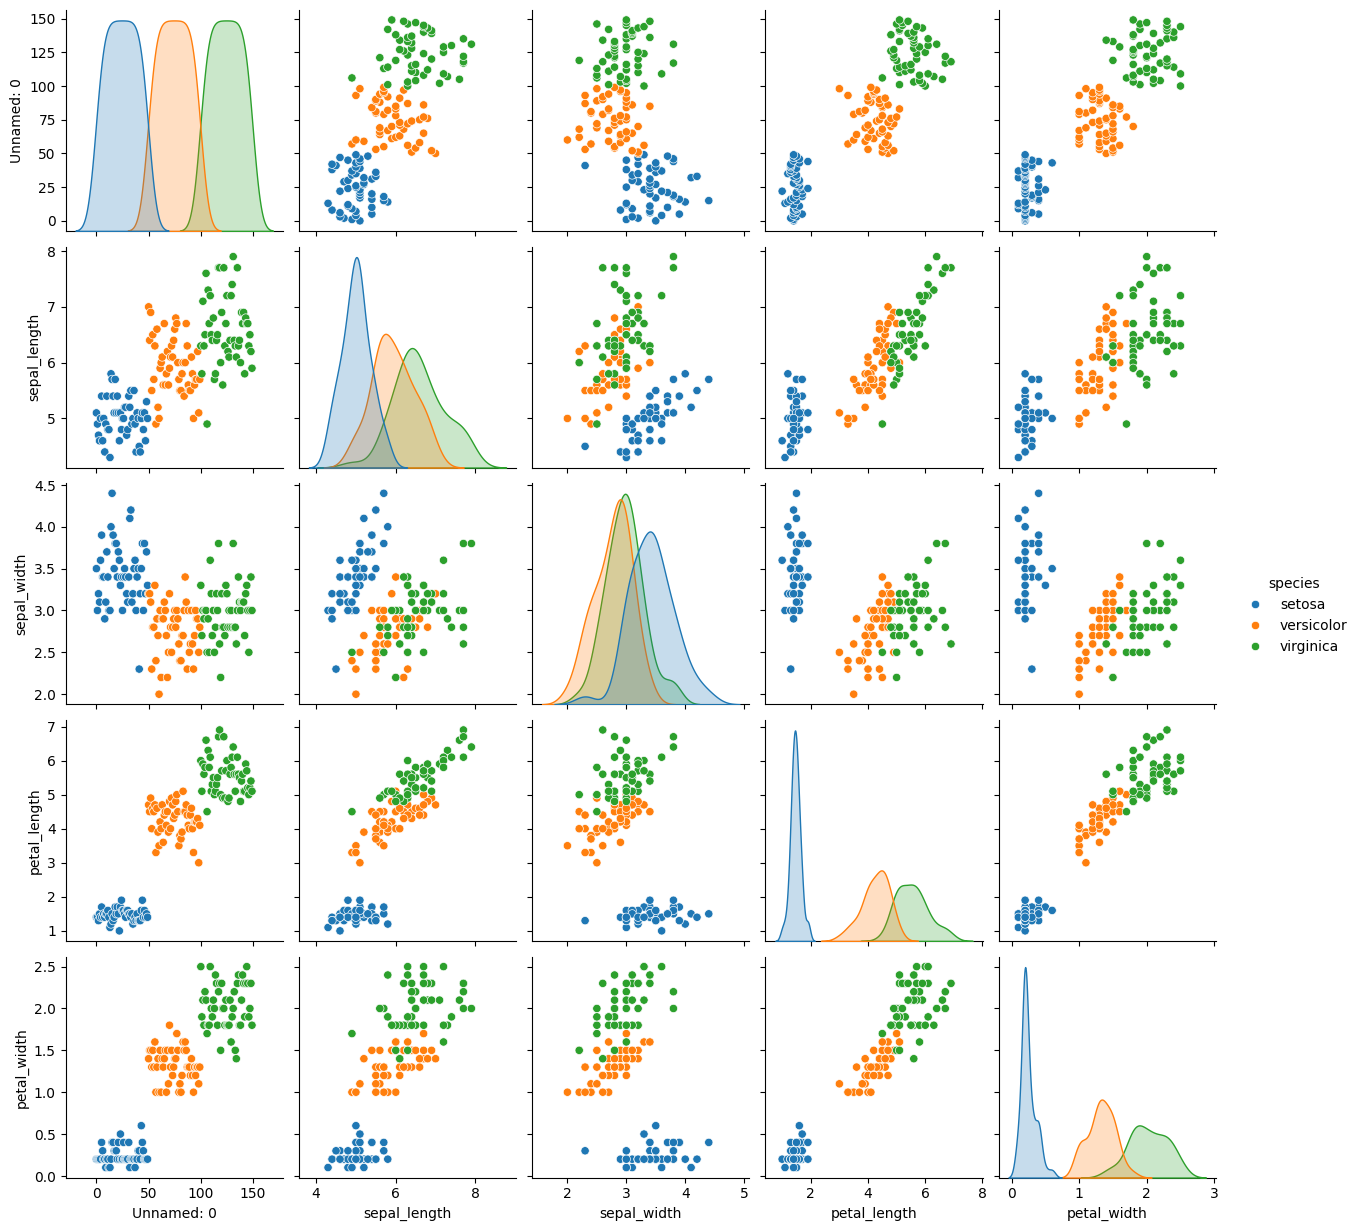

In [18]:
sns.pairplot(df,hue='species')

3-scatterplot

Scatter Plot: Used to observe the relationship or correlation between two numerical variables.


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

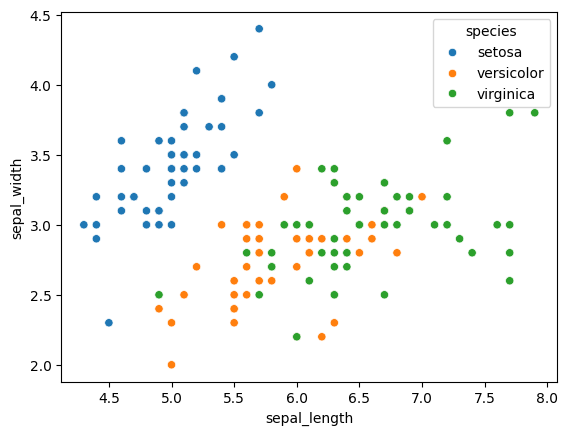

In [20]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)

4-Boxplot

Box Plot: Used to show data distribution, median, quartiles, and detect outliers.


<Axes: xlabel='species', ylabel='sepal_length'>

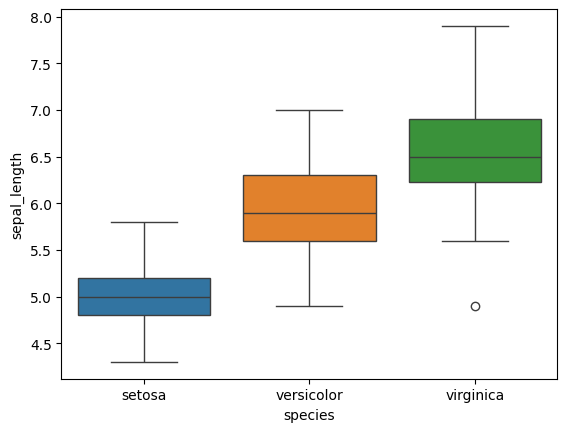

In [26]:
sns.boxplot(x='species',y='sepal_length',data=df,hue="species")

5-Histplot

Histogram: Used to visualize the frequency distribution of a single numerical variable.

<Axes: xlabel='sepal_length', ylabel='Count'>

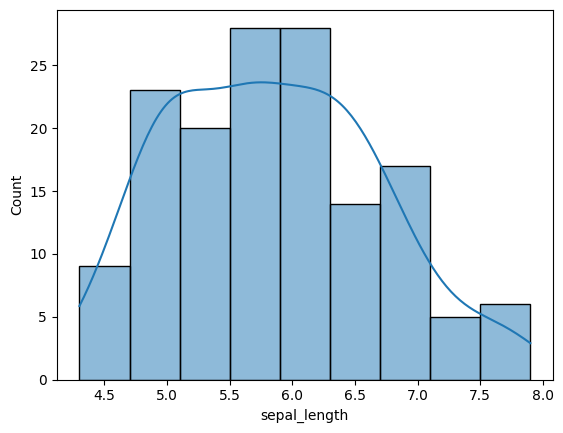

In [28]:
sns.histplot(df['sepal_length'],kde=True)

# Model Impliment

1-Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

x=df.drop(['species'],axis=1)
y=df['species']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

classification=classification_report(y_test,y_pred)
Accuracy=accuracy_score(y_test,y_pred)
print(classification)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
print(Accuracy)

1.0


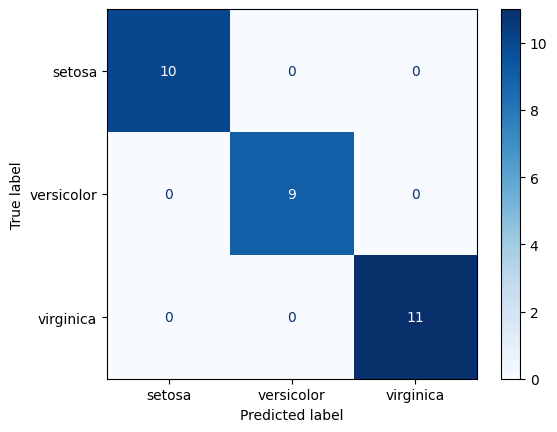

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['setosa', 'versicolor', 'virginica']
)

disp.plot(cmap='Blues')
plt.show()


2-SVM(Support Vector Machine)

In [52]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',C=1.0,gamma='scale')
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm,
      target_names=['setosa', 'versicolor', 'virginica']))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

1.0

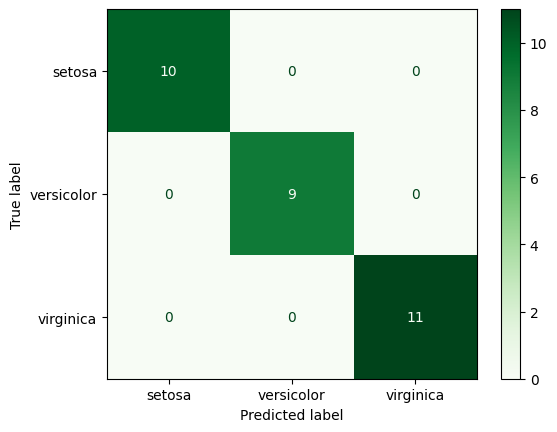

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_svm,
    display_labels=['setosa', 'versicolor', 'virginica']
)

disp.plot(cmap='Greens')
plt.show()


* with GridSearch cv

GridSearchCV finds the best hyperparameters(seperate classes) automatically using cross-validation.

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline (Scaling + SVM)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Parameter Grid
param_grid = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto']
}

# GridSearchCV
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Train
grid.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [58]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best CV Accuracy: 1.0


3-Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(x_train, y_train)

y_pred_random = model.predict(x_test)


In [62]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_random,
    target_names=['setosa', 'versicolor', 'virginica']
))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



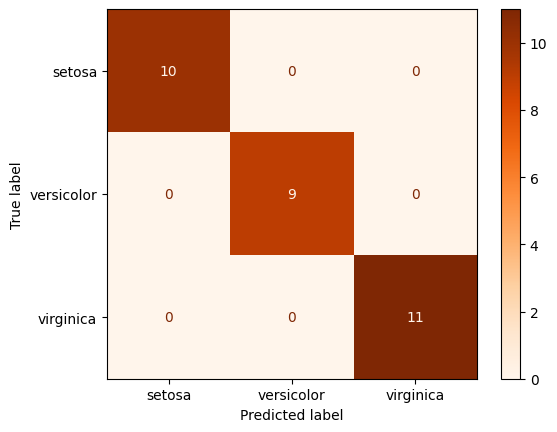

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_random = confusion_matrix(y_test, y_pred_random)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_random,
    display_labels=['setosa', 'versicolor', 'virginica']
)

disp.plot(cmap='Oranges')
plt.show()


4-KNN (K_Nearest_NEiighbour)

In [75]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)


In [76]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_knn,
    target_names=['setosa', 'versicolor', 'virginica']
))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



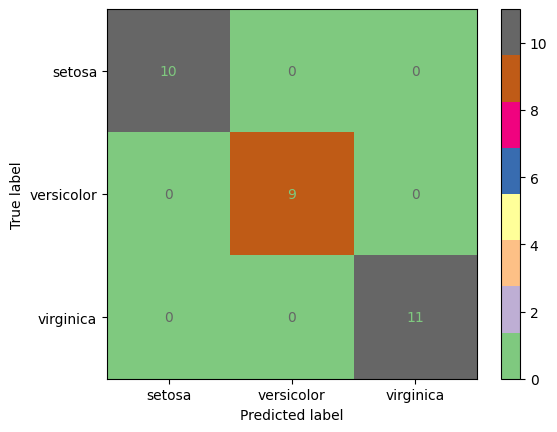

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_knn,
    display_labels=['setosa', 'versicolor', 'virginica']
)

disp.plot(cmap='Accent')
plt.show()
